In [ ]:
# 01_data_loading.ipynb

# Author: Eryk Urbański
# Date: April 2025
# Description: Load raw EEG data and convert to MNE format for further processing.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

import sys
sys.path.append("../src")  # Adjust this path as needed
from vis import plot_eeg, plot_eeg_with_time
from denoising_methods import *

In [ ]:
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
import os
os.environ["MNE_DATA"] = "E:\\mne_data"
# print(os.environ["MNE_DATA"])
subjects = [1]  # may vary
runs = [4, 8, 12]  # may vary
raw_fnames = eegbci.load_data(subjects, runs)
raws = [read_raw_edf(f, preload=True) for f in raw_fnames]
# concatenate runs from subject
raw = concatenate_raws(raws)
# make channel names follow standard conventions
eegbci.standardize(raw)

In [ ]:
raw.plot(duration=5, n_channels=10)

In [ ]:
data, times = raw[:] # data: channels x time ; times: time x 1
data.shape, times.shape

In [35]:
data[2, 200], times[200], times[201], times[400], times[-1]

(np.float64(9.8e-05),
 np.float64(1.25),
 np.float64(1.25625),
 np.float64(2.5),
 np.float64(374.99375))

In [26]:
data_df = pd.DataFrame(data.T, columns=raw.ch_names)
data_df.head(5)

,FC5,FC3,FC1,FCz,FC2,FC4,FC6,C5,C3,C1,...,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,Iz
0,-0.000005,0.000002,0.000037,0.000039,0.000030,0.000026,-0.000016,-0.000014,0.000004,0.000018,...,-0.000021,-0.000008,-0.000035,-0.000045,-0.000066,-0.000039,-0.000033,-0.000048,-0.000039,-0.000039
1,-0.000012,-0.000024,0.000001,-0.000002,-0.000015,-0.000022,-0.000055,-0.000036,-0.000027,-0.000025,...,-0.000050,-0.000040,-0.000068,-0.000065,-0.000084,-0.000052,-0.000021,-0.000042,-0.000031,-0.000034
2,-0.000077,-0.000078,-0.000059,-0.000065,-0.000063,-0.000055,-0.000067,-0.000088,-0.000071,-0.000065,...,-0.000017,-0.000022,-0.000050,-0.000035,-0.000048,-0.000018,-0.000020,-0.000042,-0.000029,-0.000027
3,-0.000066,-0.000067,-0.000050,-0.000065,-0.000060,-0.000055,-0.000068,-0.000062,-0.000053,-0.000054,...,-0.000039,-0.000060,-0.000078,-0.000064,-0.000068,-0.000041,-0.000044,-0.000062,-0.000034,-0.000043
4,-0.000045,-0.000055,-0.000033,-0.000053,-0.000054,-0.000063,-0.000083,-0.000052,-0.000050,-0.000053,...,-0.000044,-0.000055,-0.000070,-0.000054,-0.000063,-0.000037,-0.000060,-0.000070,-0.000034,-0.000045


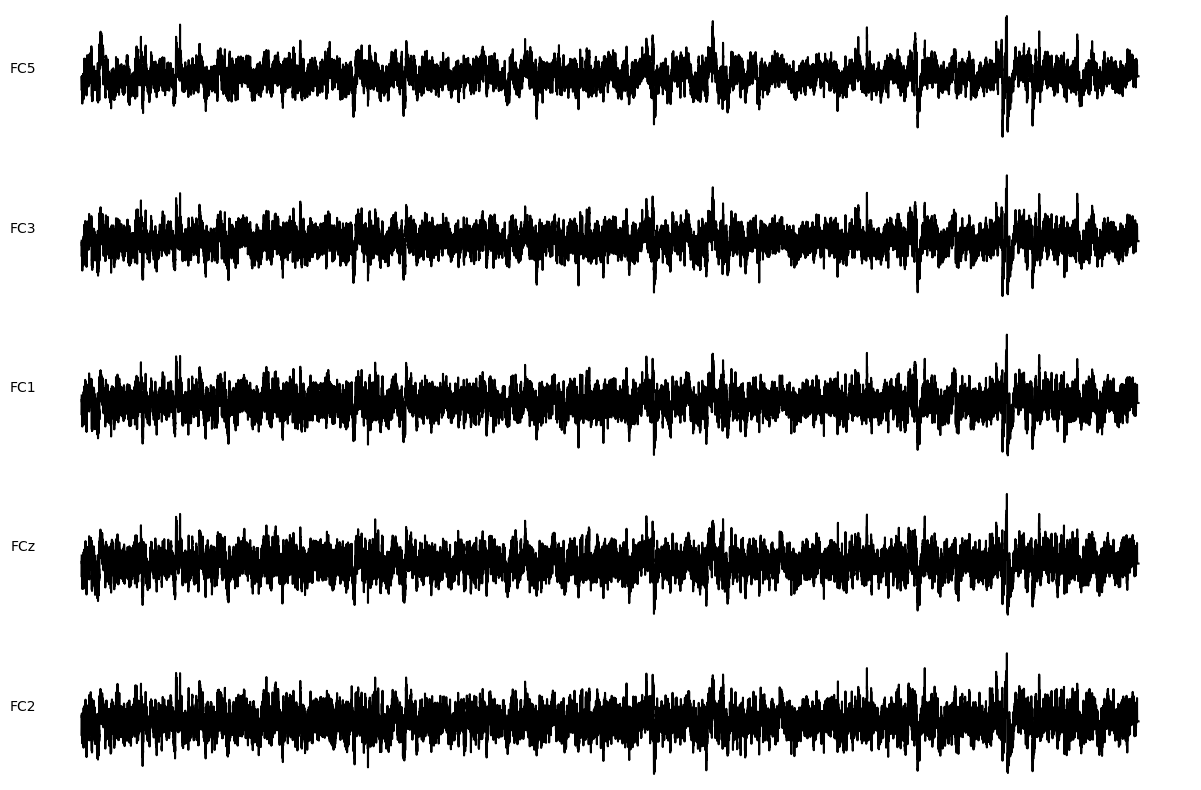

In [27]:
plot_eeg(data_df, n_channels_to_plot=5)

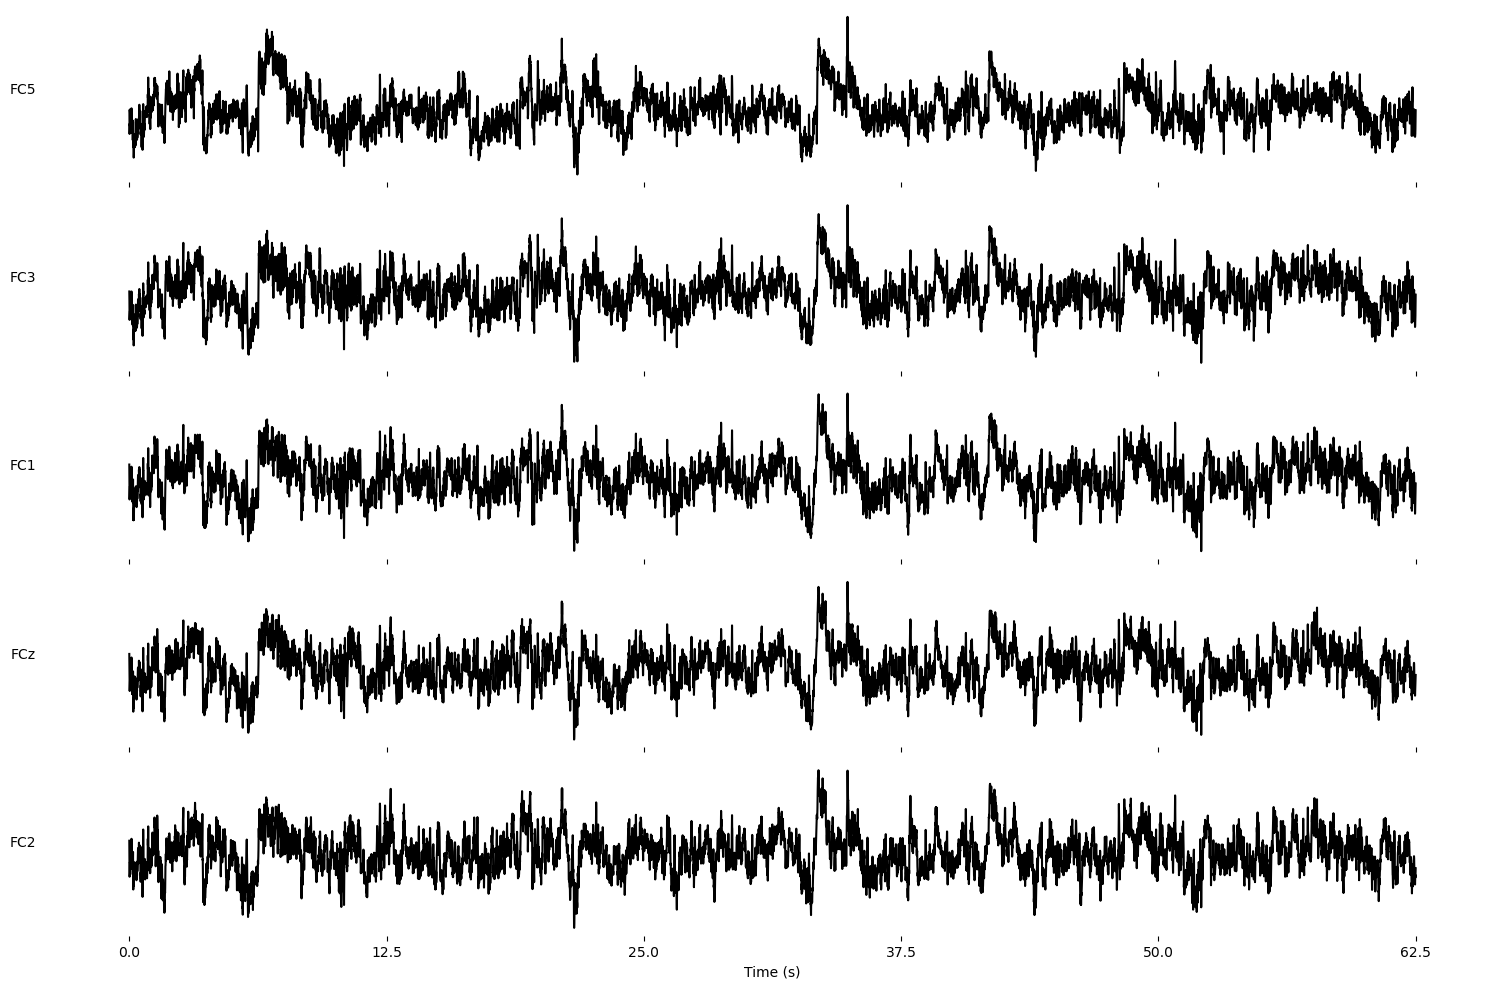

In [37]:
plot_eeg_with_time(data_df.iloc[:10000,:], times=times[:10000], n_channels_to_plot=5)

In [54]:
# Save data and times to a pickle file
with open("../data/eeg_data.pkl", "wb") as f:
    pickle.dump({"data": data_df, "times": times}, f)

Index(['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz',
       'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6',
       'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5',
       'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8',
       'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4',
       'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'],
      dtype='object')


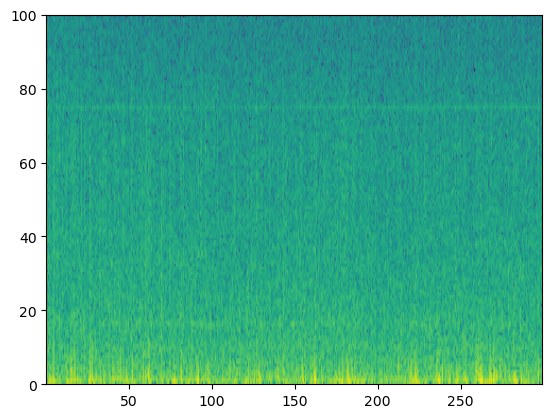

In [53]:
print(data_df.columns)
_ = plt.specgram(data_df["AF3"], Fs=200)